In [1]:
# Create Adversarial Cross Sections like image below
# compare Classic vs FGNs (converted, quick retrain, deep retrain)

![](https://lh5.googleusercontent.com/DNP_DKcOfg3blxS3PZDjrww6SmtsxEae1IqOqredx9HLLWhmpsl7Bcm_THlkLxhKmA024Qcg3klt5FdIqv2ijBBuhS1Nl6VHoUDQr3wM=s1017)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

In [4]:
import numpy as np
import torch
from torch import optim
import copy

In [5]:
# custom library imports
import sys
sys.path.append('/home/felix/Research/Adversarial Research/FGN---Research/')
import Finite_Gaussian_Network_lib as fgnl
import Finite_Gaussian_Network_lib.fgn_helper_lib as fgnh

In [6]:
# check gpus
!gpustat

crescent                Fri Jul 31 10:26:49 2020  418.87.01
[0] GeForce RTX 2080 Ti | 43'C,   0 % |  1353 / 10989 MB | felix(1343M)
[1] GeForce RTX 2080 Ti | 51'C,   0 % |   785 / 10989 MB | felix(775M)


In [7]:
# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")
print("Using device:", device)

# manualy set cuda device
torch.cuda.set_device(1)

CUDA Available:  True
Using device: cuda


In [8]:
# get data 
(mnist_train_loader, mnist_val_loader, mnist_test_loader) = fgnh.mnist_dataloaders(batch_size=10000, 
                                                                                   batch_size_for_val=10000)

In [9]:
# load classic model
classic_model_path = "../Experiments/sample_models/sample_classic_full.pth"
classic_model = torch.load(classic_model_path)
classic_model.to(device)

Feedforward_Classic_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): Linear(in_features=64, out_features=10, bias=True)
)

In [10]:
# load an fgn model check same params as FGN
fgn_model_path = '../Experiments/sample_models/sample_FGN_full.pth'
conv_fgn_model = torch.load(fgn_model_path)
conv_fgn_model.to(device)

Feedforward_FGN_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
    (1): FGN_layer()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): FGN_layer()
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): FGN_layer()
)

In [11]:
# model params
!cat '../Experiments/sample_models/sample_FGN_parameters.txt'

hidden_layer_sizes [64, 64]
drop_p 0.2
batch_size 4000
optimizer Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)
ordinal 2.0
covar_type sphere
lambda for l2 loss 8e-06
lambda for sigma loss 1e-06
non-linearity True


In [12]:
# # model from scratch
# hidden_layer_sizes = [64, 64]
# drop_p = 0.2
# ordinal = 3
# covar_type = 'diag'
# non_lin = True

# conv_fgn_model = fgnl.Feedforward_FGN_net(in_feats=28*28, out_feats=10,
#                                           hidden_layer_sizes = hidden_layer_sizes,
#                                           drop_p = drop_p,
#                                           ordinal = ordinal,
#                                           covar_type = covar_type,
#                                           non_lin = non_lin,
#                                           )

In [13]:
# convert model
fgnl.convert_classic_to_fgn(classic_model, conv_fgn_model, init_factor=1e1, verbose=True)

odict_keys([])

Classic odict_keys(['hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'hidden_layers.2.running_mean', 'hidden_layers.2.running_var', 'hidden_layers.2.num_batches_tracked', 'hidden_layers.4.weight', 'hidden_layers.4.bias', 'hidden_layers.5.weight', 'hidden_layers.5.bias', 'hidden_layers.5.running_mean', 'hidden_layers.5.running_var', 'hidden_layers.5.num_batches_tracked', 'ib.weight', 'ib.bias', 'ib.running_mean', 'ib.running_var', 'ib.num_batches_tracked', 'fl.weight', 'fl.bias'])
FGN odict_keys(['hidden_layers.1.weights', 'hidden_layers.1.biases', 'hidden_layers.1.centers', 'hidden_layers.1.inv_covars', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'hidden_layers.2.running_mean', 'hidden_layers.2.running_var', 'hidden_layers.2.num_batches_tracked', 'hidden_layers.4.weights', 'hidden_layers.4.biases', 'hidden_layers.4.centers', 'hidden_layers.4.inv_covars', 'hidden_layers.5.weight', 'hidden_layers.5.bias', 'hidden_la

In [14]:
# do a quick retrain of the converted model
ret_quick_fgn_model = copy.deepcopy(conv_fgn_model)

# define loss
lmbda_l2 = (4.0*0.1/len(mnist_train_loader.dataset))
lmbda_sigs = 1e1
print("lambda for l2 loss", lmbda_l2)
print("lambda for sigs^2 loss", lmbda_sigs)

cross_ent_loss = fgnl.def_fgn_cross_ent_loss(lmbda_l2, lmbda_sigs)

# define optimizer
optimizer = optim.Adam(filter(lambda p: p.requires_grad, ret_quick_fgn_model.parameters()), lr=1e-3)

# train the network for N epochs
epochs = 1
train_res = fgnh.train(ret_quick_fgn_model, mnist_train_loader, 
                             cross_ent_loss, optimizer, epochs, save_hist=2, verbose=True, 
                             pred_func=fgnh.cross_ent_pred_accuracy, test_loader=mnist_val_loader)

lambda for l2 loss 8e-06
lambda for sigs^2 loss 10.0
Epoch 0 Train set - Average loss: 1406990.4187, Accuracy: 48387/50000 (97%)
Test set - Average loss: 347385.9688, Accuracy: 9750/10000 (98%)


In [15]:
# load heavily retrained model
ret_long_fgn_model_path = '../Experiments/sample_models/sample_fgn_converted+retrained_full.pth'
ret_long_fgn_model = torch.load(ret_long_fgn_model_path)
ret_long_fgn_model.to(device)

Feedforward_FGN_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
    (1): FGN_layer()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): FGN_layer()
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): FGN_layer()
)

# Preliminary: Verify accuracies and confidences

In [16]:
# make sure all the models perform well on MNIST

for m, name in zip([classic_model, conv_fgn_model, ret_quick_fgn_model, ret_long_fgn_model],
                   ['classic_model', 'conv_fgn_model', 'ret_quick_fgn_model', 'ret_long_fgn_model']):
    
    print('Results for {}'.format(name))
    # accuracies
    _ = fgnh.test(m, mnist_train_loader,
                     pred_func=fgnh.cross_ent_pred_accuracy, verbose=True)
    _ = fgnh.test(m, mnist_val_loader,
                     pred_func=fgnh.cross_ent_pred_accuracy, verbose=True)
    

Results for classic_model
Test set - Average loss: 0.0319, Accuracy: 49509/50000 (99%)
Test set - Average loss: 0.0933, Accuracy: 9739/10000 (97%)
Results for conv_fgn_model
Test set - Average loss: 0.0321, Accuracy: 49509/50000 (99%)
Test set - Average loss: 0.0923, Accuracy: 9738/10000 (97%)
Results for ret_quick_fgn_model
Test set - Average loss: 0.0309, Accuracy: 49544/50000 (99%)
Test set - Average loss: 0.0885, Accuracy: 9750/10000 (98%)
Results for ret_long_fgn_model
Test set - Average loss: 0.0171, Accuracy: 49738/50000 (99%)
Test set - Average loss: 0.0763, Accuracy: 9805/10000 (98%)


Results for classic_model


<IPython.core.display.Javascript object>


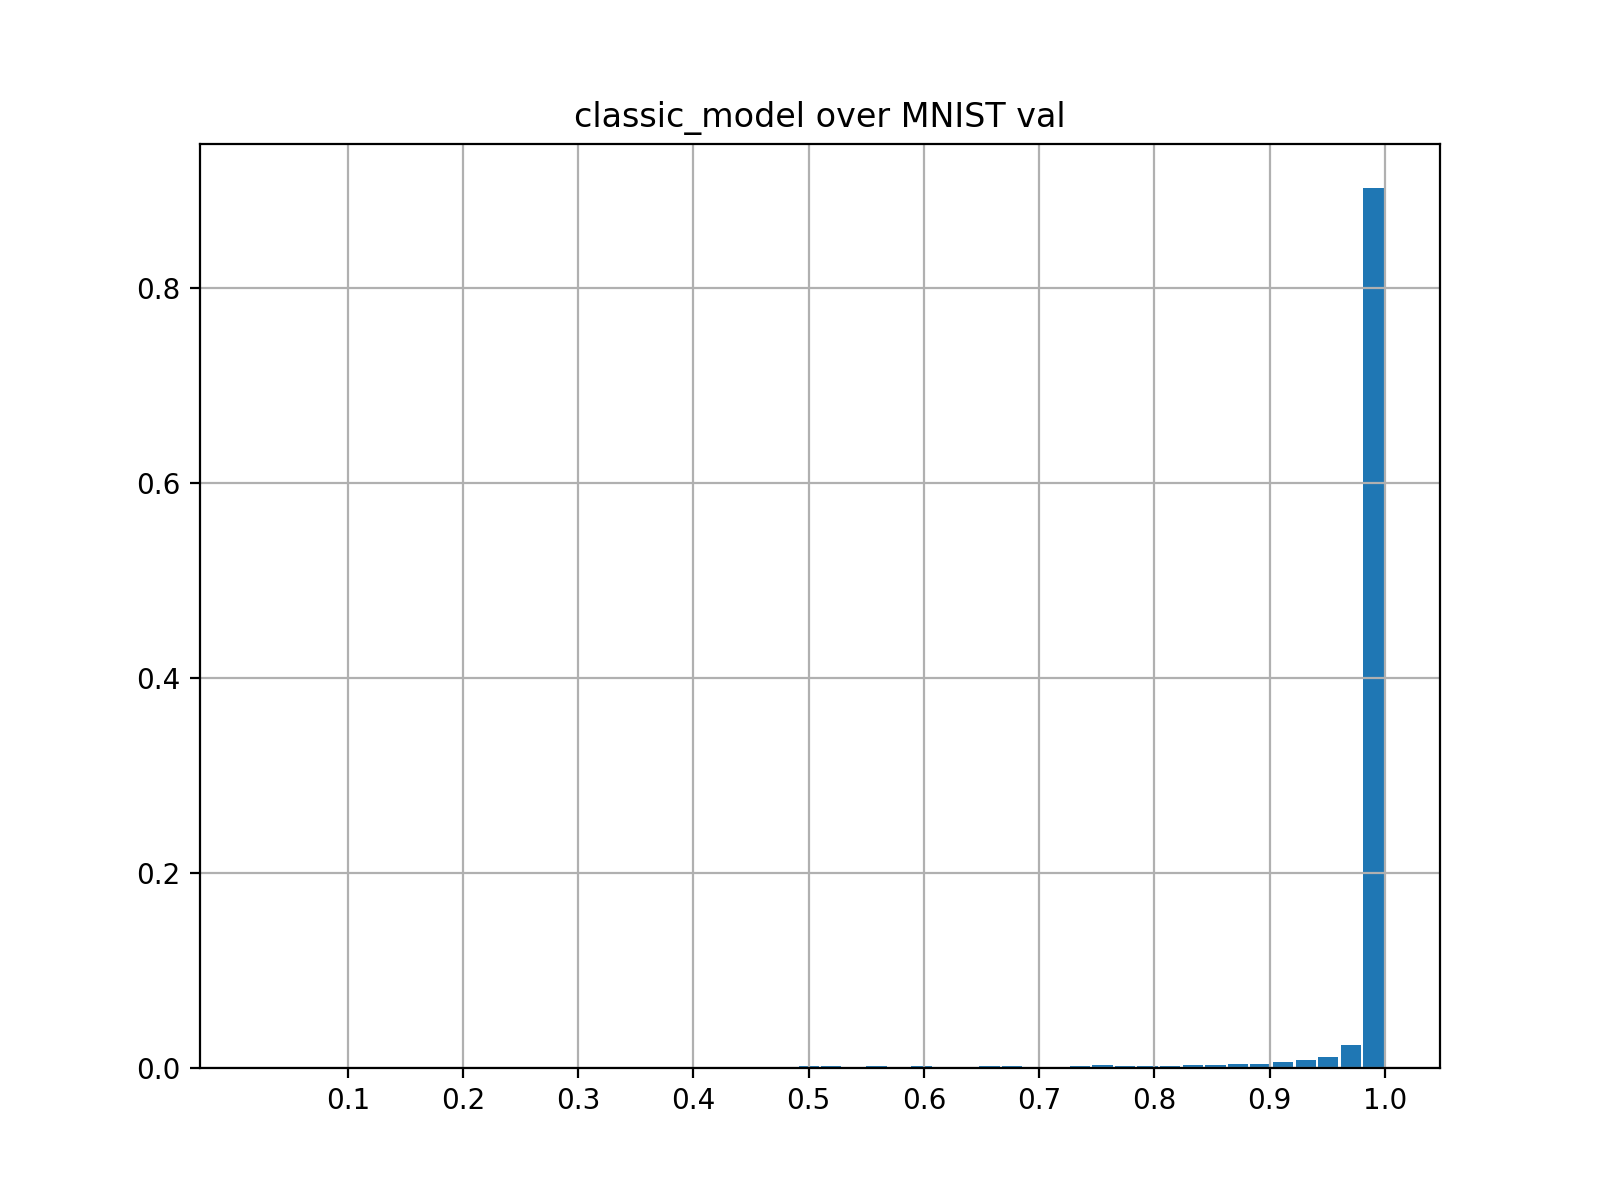

Statistical description of the predictions maximums
DescribeResult(nobs=10000, minmax=(0.29280932485783233248, 0.99999246432283158857), mean=0.9822350623936944061, variance=0.0049176367516489725166, skewness=-5.3998690770675446438, kurtosis=31.408323780392076695)

percentage of confident predictions (>=0.5): 0.9961

Sample predictions
index 2107 prediction [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
index 7990 prediction [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
index 1295 prediction [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
index 2533 prediction [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
index 8159 prediction [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Results for conv_fgn_model


<IPython.core.display.Javascript object>


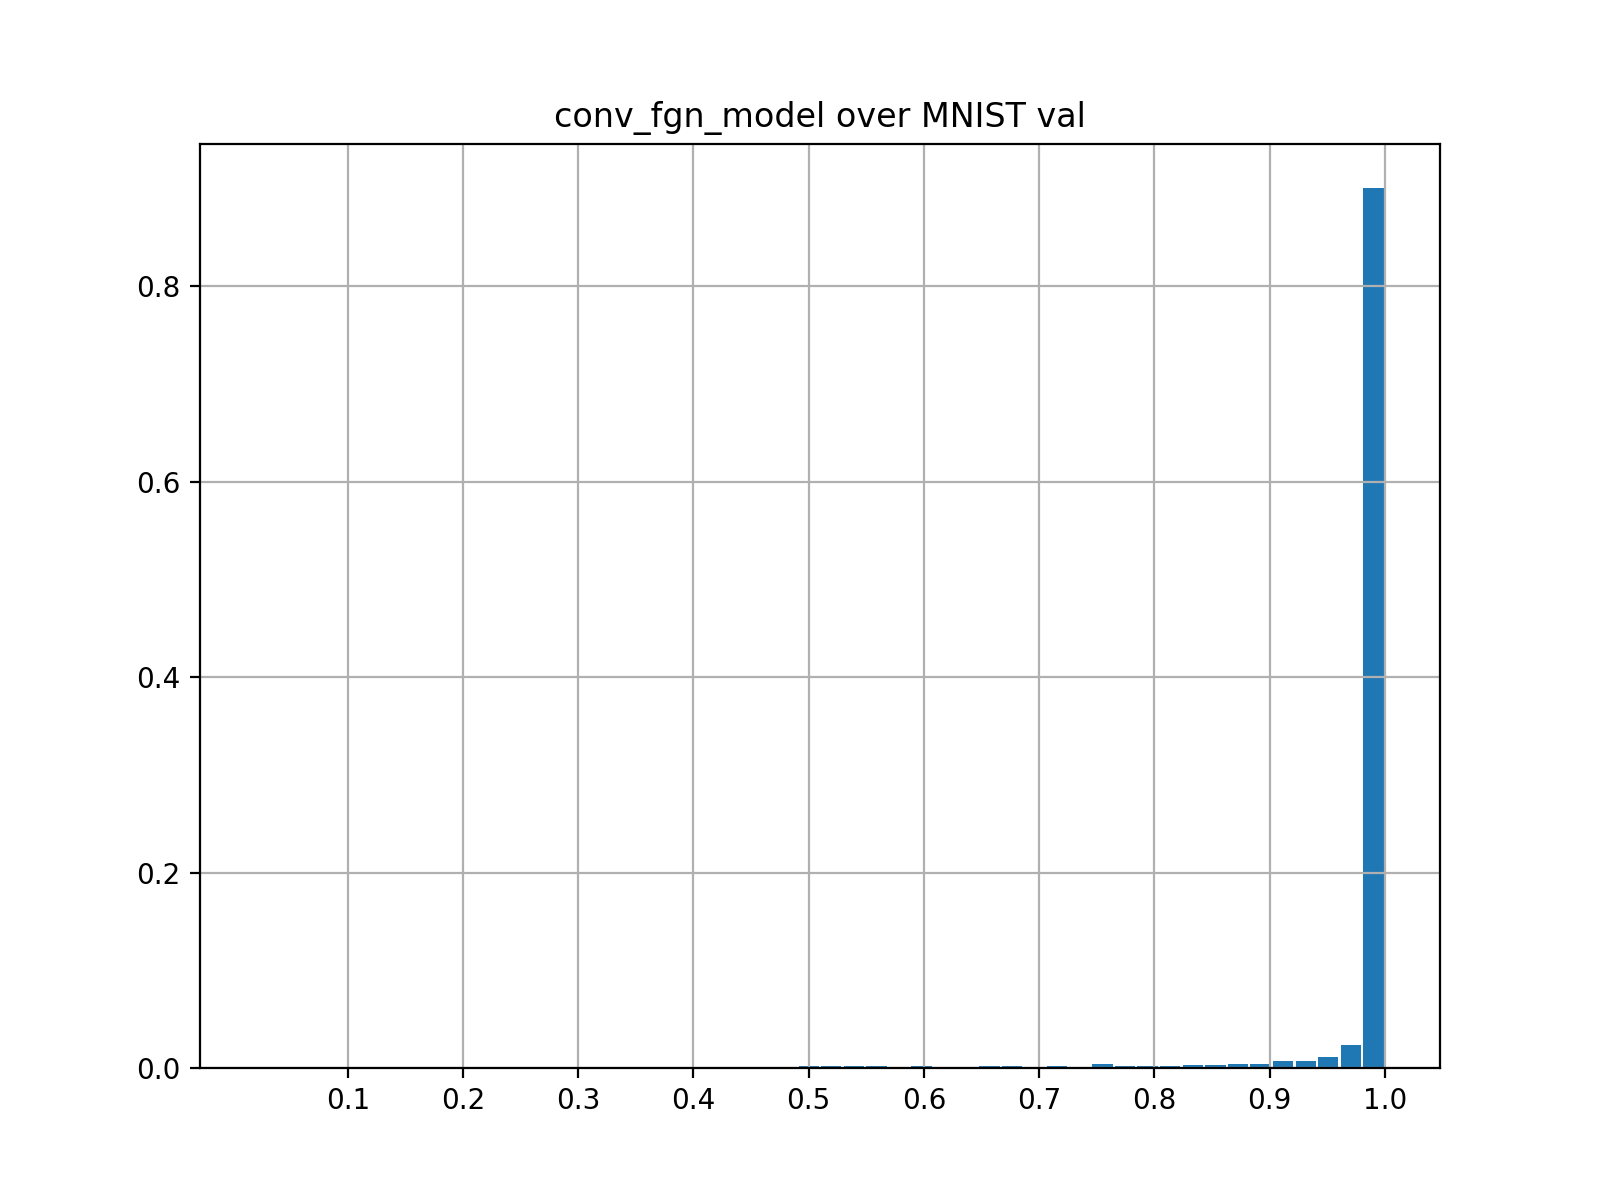

Statistical description of the predictions maximums
DescribeResult(nobs=10000, minmax=(0.29288776518218747819, 0.99999100718460218824), mean=0.98190489762210839277, variance=0.0049970370702997461507, skewness=-5.36155981525085235, kurtosis=30.949311241988106274)

percentage of confident predictions (>=0.5): 0.9958

Sample predictions
index 6978 prediction [0.   0.   0.   0.   0.01 0.   0.   0.   0.99 0.  ]
index 3097 prediction [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
index 9771 prediction [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
index 4724 prediction [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
index 2498 prediction [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Results for ret_quick_fgn_model


<IPython.core.display.Javascript object>


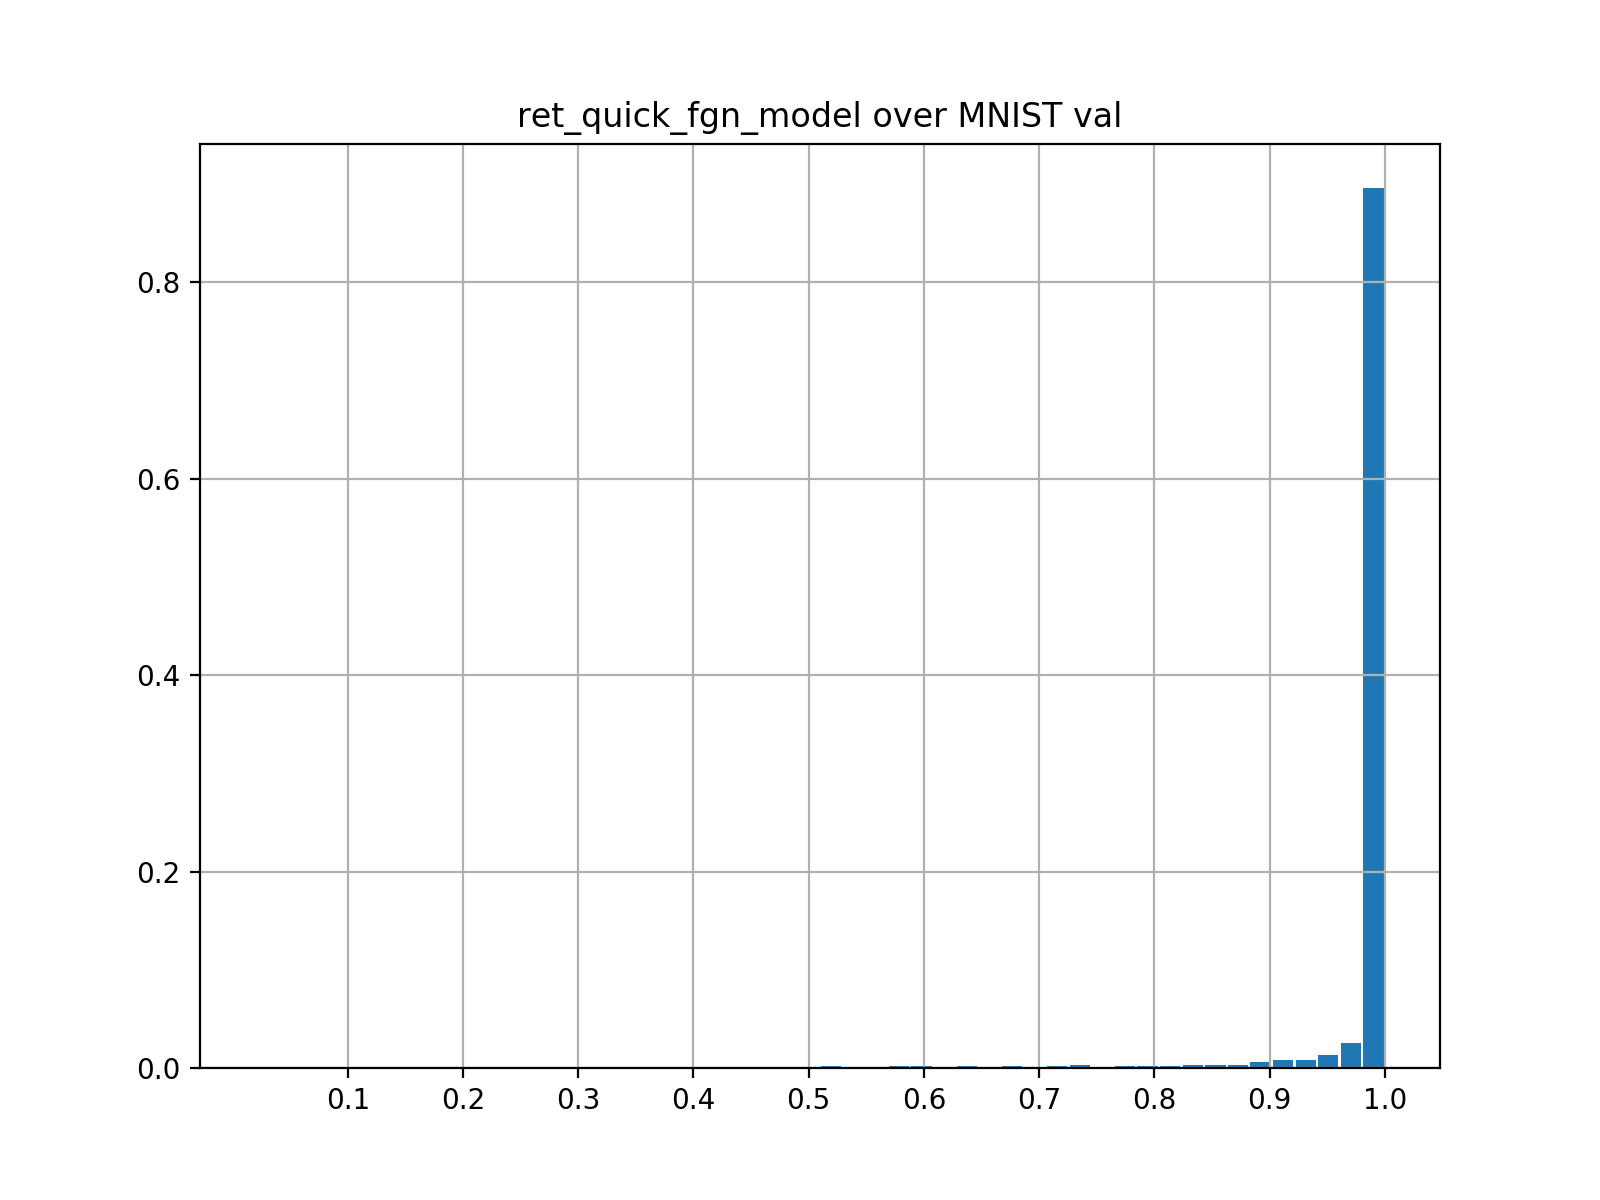

Statistical description of the predictions maximums
DescribeResult(nobs=10000, minmax=(0.10666156920917196677, 0.9999888500424896434), mean=0.98108759196651007626, variance=0.0055136625518056834933, skewness=-5.6280020352644499833, kurtosis=35.648245554806218333)

percentage of confident predictions (>=0.5): 0.9948

Sample predictions
index 5317 prediction [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
index 6831 prediction [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
index 976 prediction [0.   0.   0.   0.97 0.   0.02 0.   0.   0.   0.  ]
index 9726 prediction [0.   0.   0.04 0.95 0.   0.   0.   0.   0.   0.  ]
index 7568 prediction [0.   0.   0.01 0.98 0.   0.   0.   0.01 0.   0.  ]

Results for ret_long_fgn_model


<IPython.core.display.Javascript object>


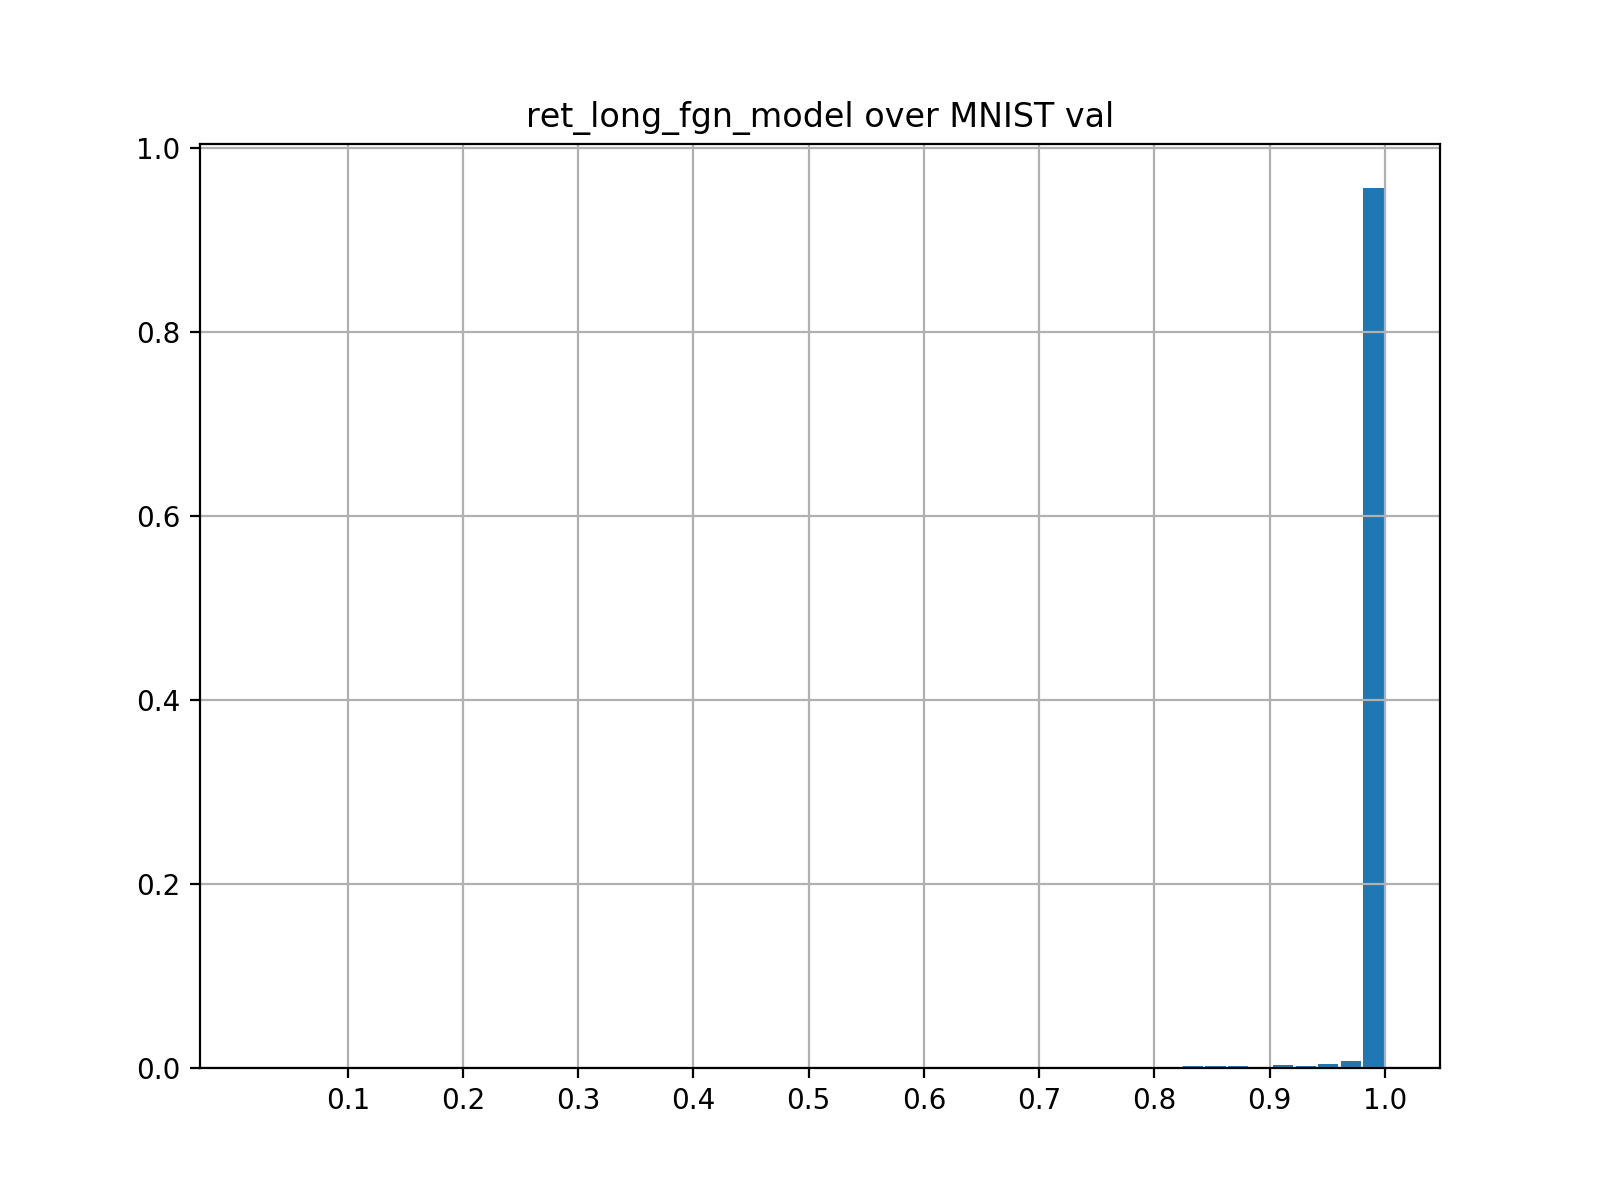

Statistical description of the predictions maximums
DescribeResult(nobs=10000, minmax=(0.1, 0.99999983811672626954), mean=0.9901067414490231112, variance=0.0037264089770538089498, skewness=-8.378325212914883234, kurtosis=82.856729252956528624)

percentage of confident predictions (>=0.5): 0.9963

Sample predictions
index 541 prediction [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
index 8175 prediction [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
index 849 prediction [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
index 7121 prediction [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
index 1121 prediction [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



In [17]:
for m, name in zip([classic_model, conv_fgn_model, ret_quick_fgn_model, ret_long_fgn_model],
                   ['classic_model', 'conv_fgn_model', 'ret_quick_fgn_model', 'ret_long_fgn_model']):
    
    print('Results for {}'.format(name))
    # confidences
    fgnh.plot_pred_histogram(m, mnist_val_loader, title='{} over MNIST val'.format(name) ,verbose=True)
    
    print()

# 1 - FGSM Hyperplanes

In [56]:
img = mnist_val_loader.dataset.tensors[0][0]
loss_func = torch.nn.CrossEntropyLoss()
epsilon=0.005
grid_size = 50

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


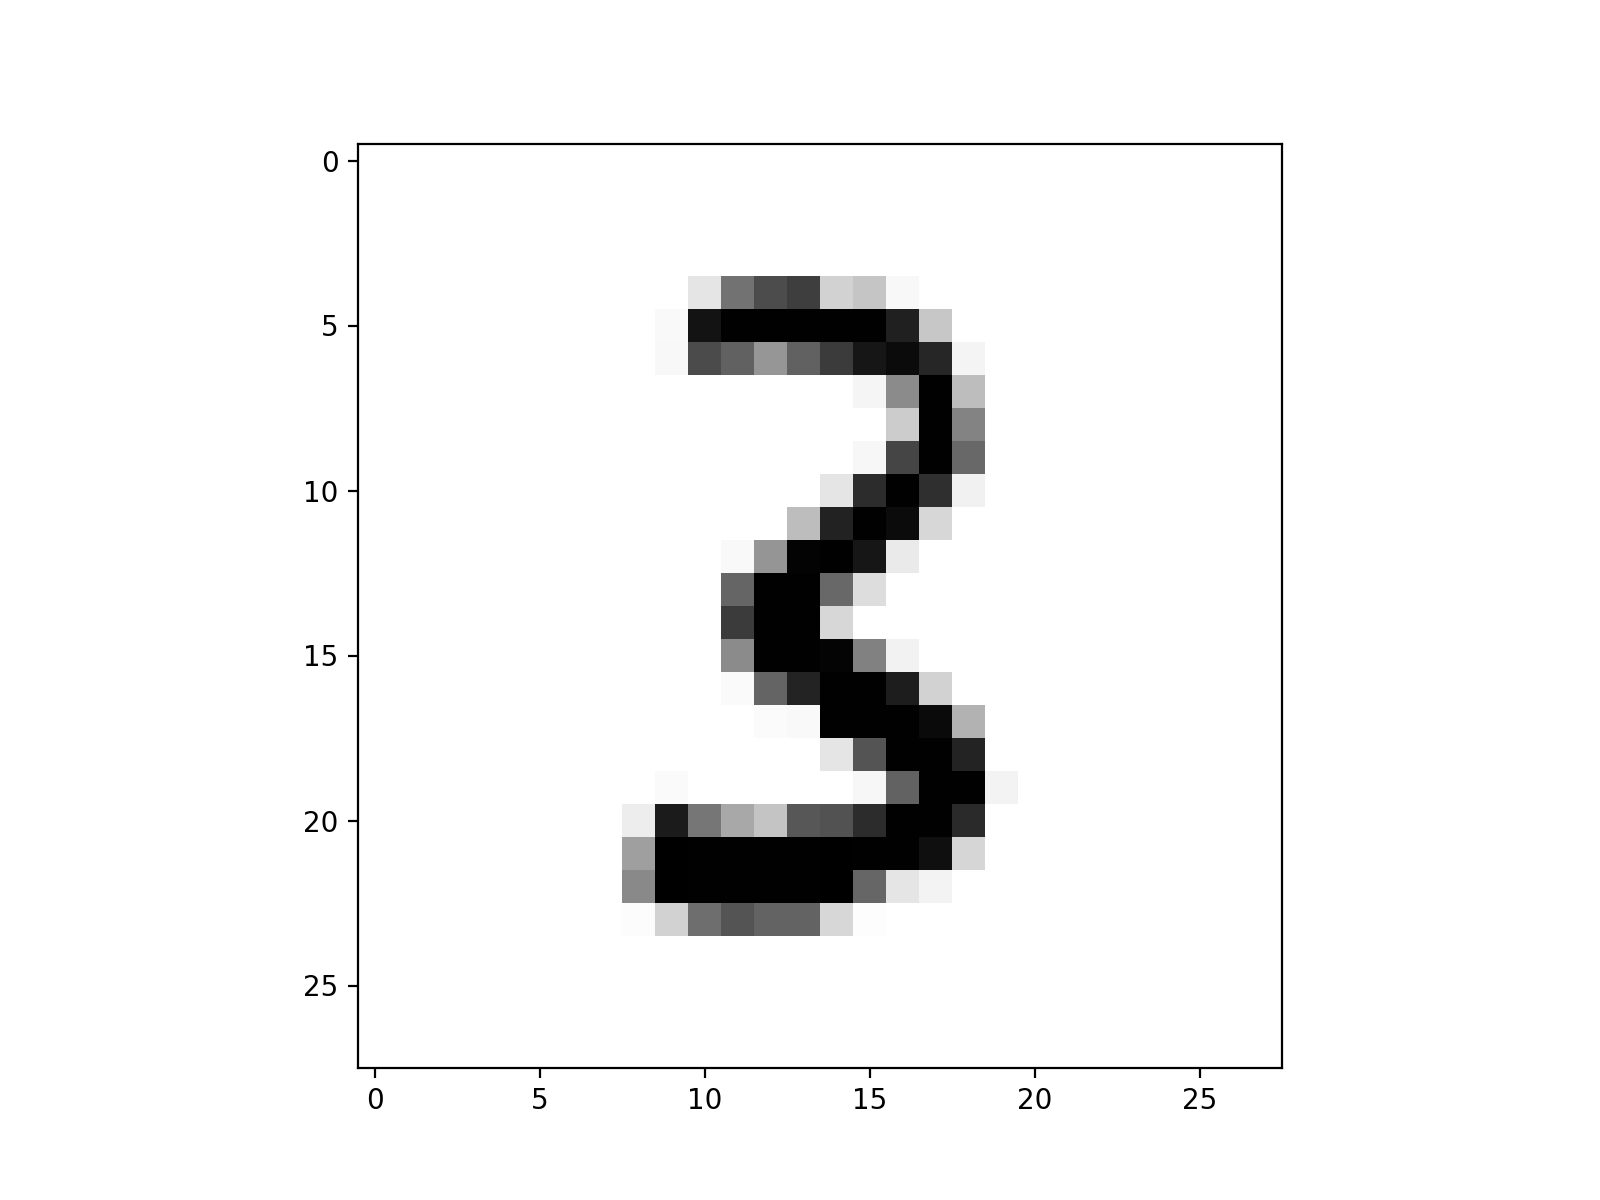

In [57]:
plt.imshow(img.numpy(), cmap='Greys')
plt.show()

In [58]:
classic_fgsm_vec = fgnl.get_fgsm_attack_vectors(classic_model, img, loss_func)

fgnh.plot_MNIST_hyperplanes(classic_model, img-epsilon*classic_fgsm_vec, img+epsilon*classic_fgsm_vec,
                            n_plots=5, grid_size=grid_size, mode='canonical',
                            title='Classic model - FGSM attack vector X Random Orthogonal Hyperplane\nepsilon=+/-{}'.format(epsilon))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


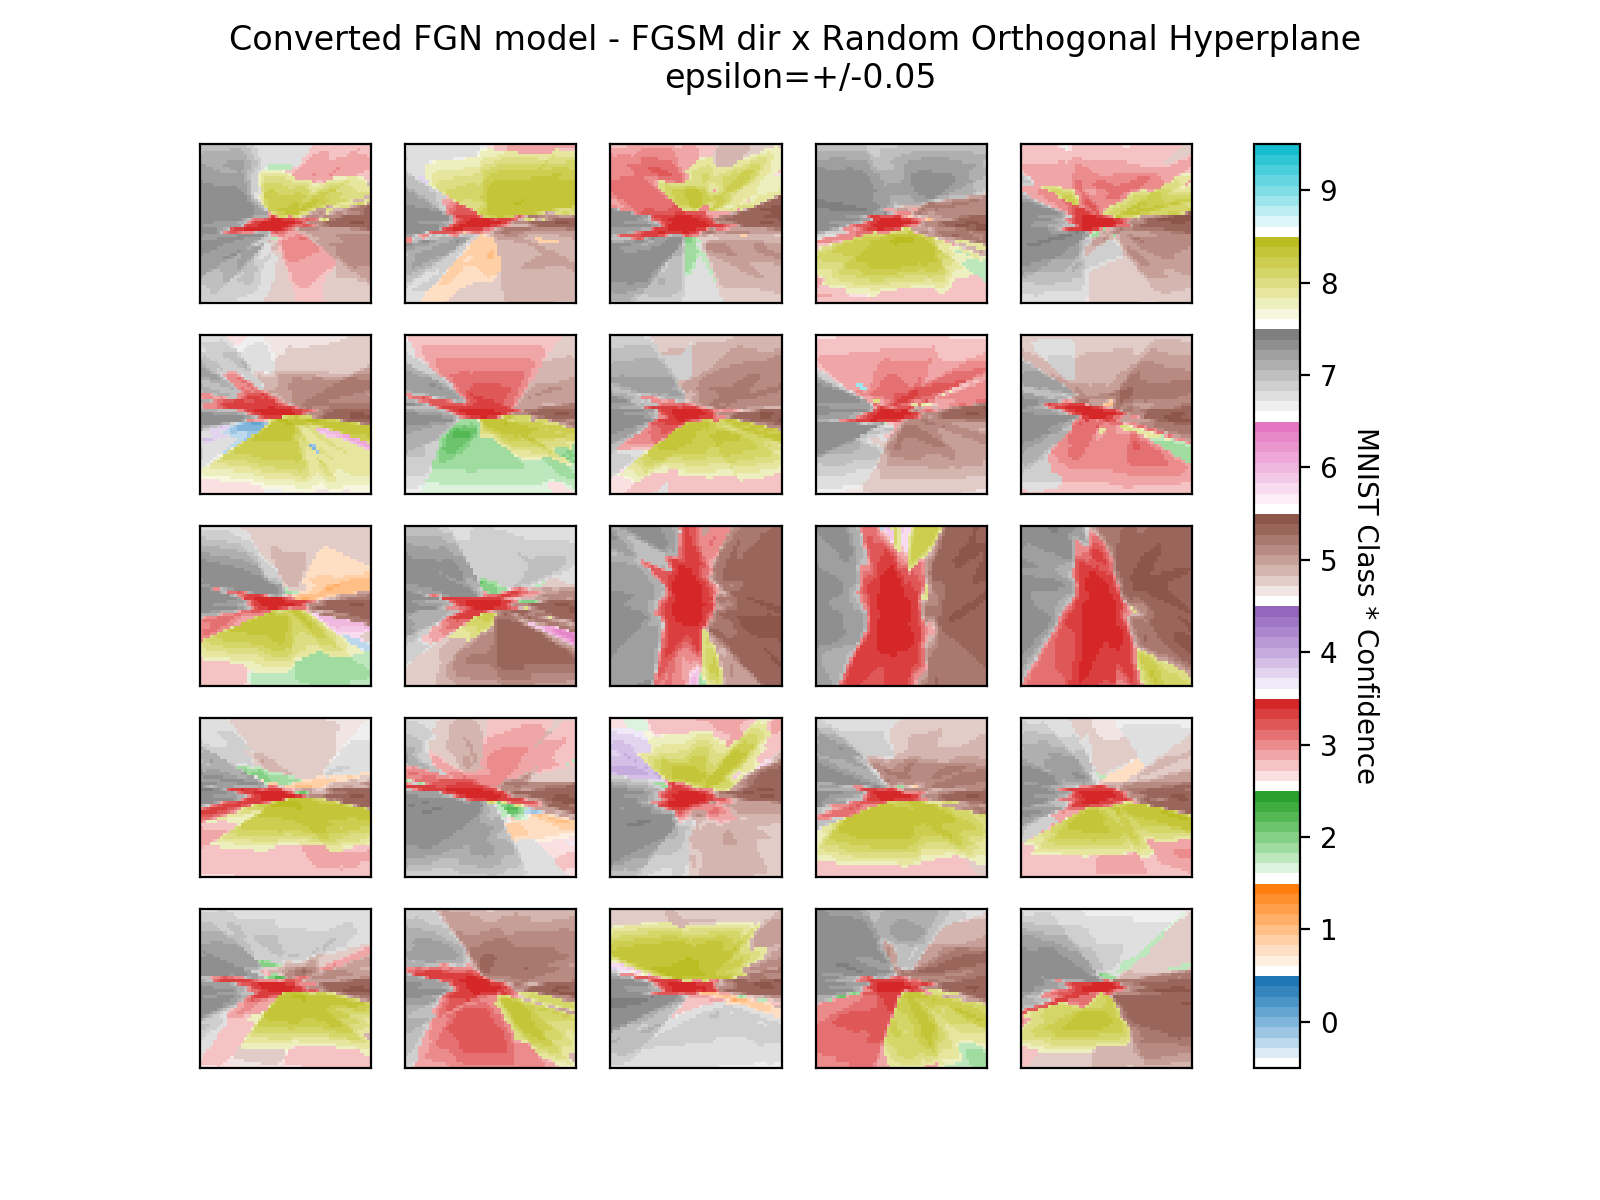

In [42]:
conv_fgn_fgsm_vec = fgnl.get_fgsm_attack_vectors(conv_fgn_model, img, loss_func)

fgnh.plot_MNIST_hyperplanes(conv_fgn_model, img-epsilon*conv_fgn_fgsm_vec, img+epsilon*conv_fgn_fgsm_vec, 
                             n_plots=5, grid_size=grid_size,  mode='canonical',
                             title='Converted FGN model - FGSM dir x Random Orthogonal Hyperplane \nepsilon=+/-{}'.format(epsilon))

<IPython.core.display.Javascript object>


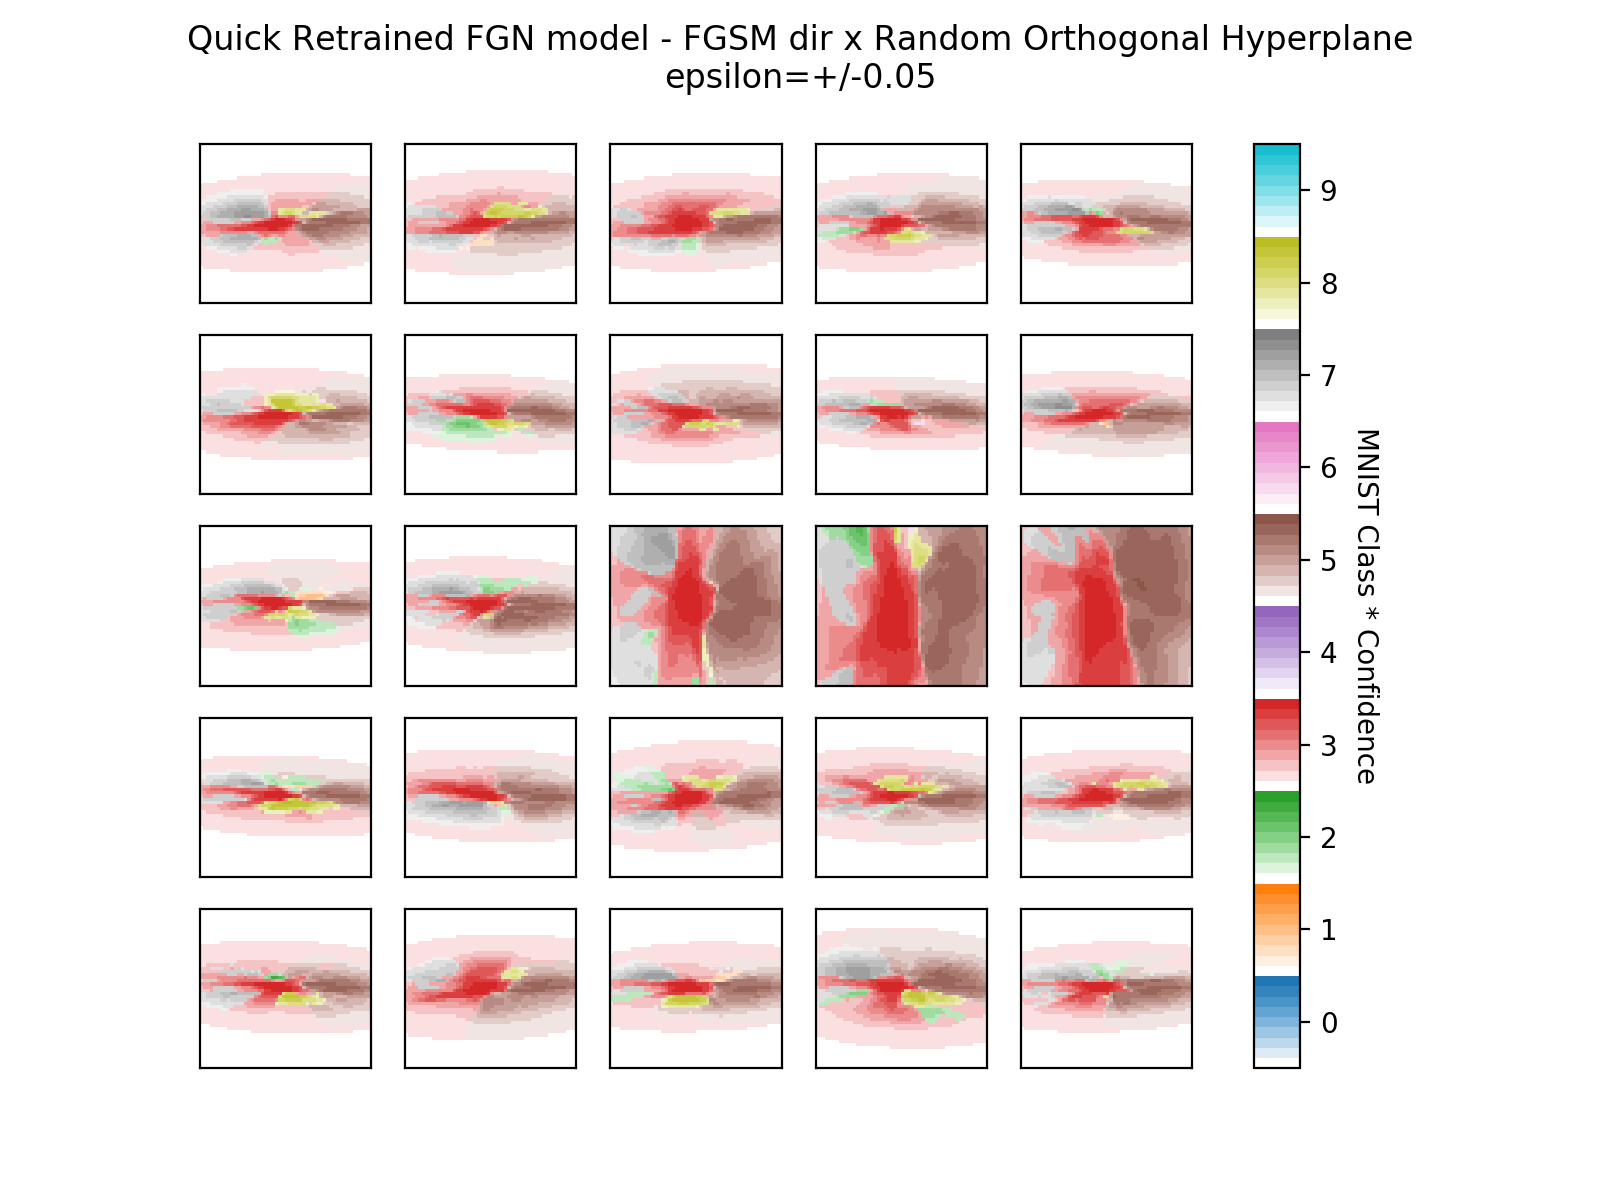

In [43]:
ret_quick_fgn_fgsm_vec = fgnl.get_fgsm_attack_vectors(ret_quick_fgn_model, img, loss_func)

fgnh.plot_MNIST_hyperplanes(ret_quick_fgn_model, img-epsilon*ret_quick_fgn_fgsm_vec, img+epsilon*ret_quick_fgn_fgsm_vec, 
                        n_plots=5, grid_size=grid_size,  mode='canonical',
                        title='Quick Retrained FGN model - FGSM dir x Random Orthogonal Hyperplane\nepsilon=+/-{}'.format(epsilon))

<IPython.core.display.Javascript object>


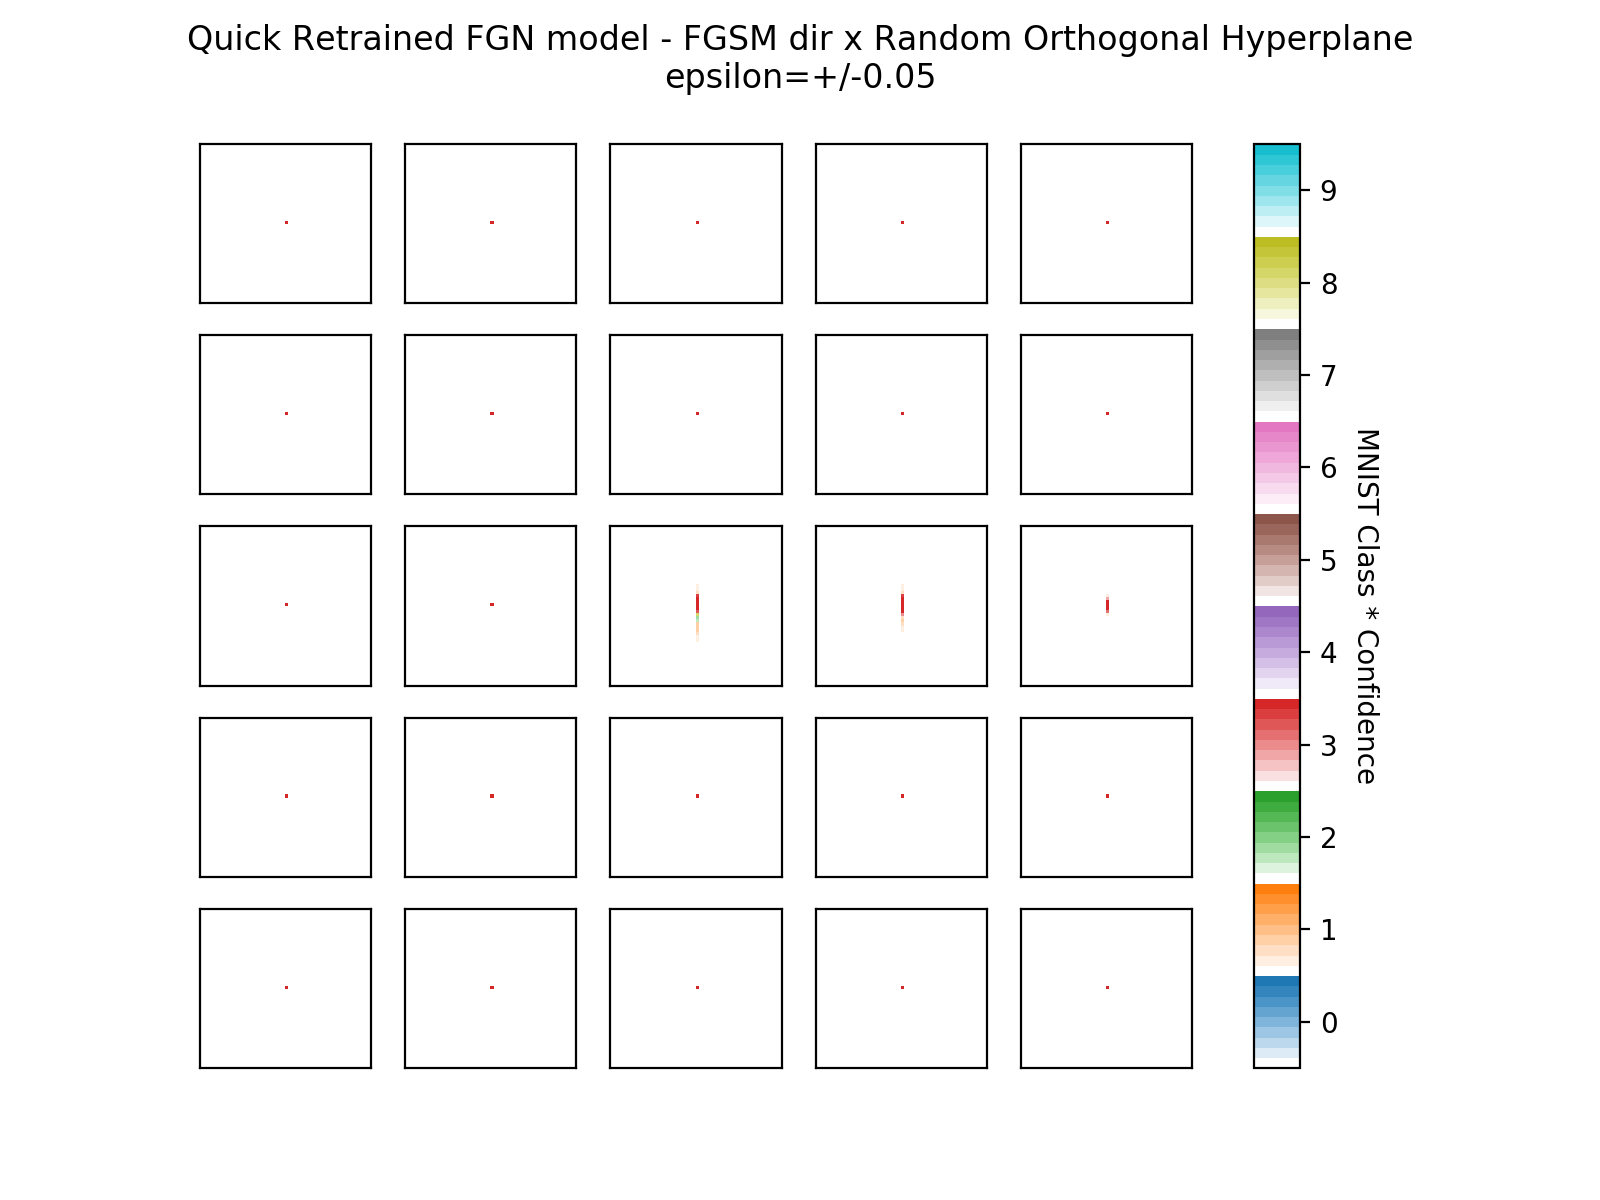

In [44]:
ret_long_fgn_fgsm_vec = fgnl.get_fgsm_attack_vectors(ret_long_fgn_model, img, loss_func)

fgnh.plot_MNIST_hyperplanes(ret_long_fgn_model, img-epsilon*ret_long_fgn_fgsm_vec, img+epsilon*ret_long_fgn_fgsm_vec, 
                        n_plots=5, grid_size=grid_size,  mode='canonical',
                        title='Quick Retrained FGN model - FGSM dir x Random Orthogonal Hyperplane\nepsilon=+/-{}'.format(epsilon))

<IPython.core.display.Javascript object>


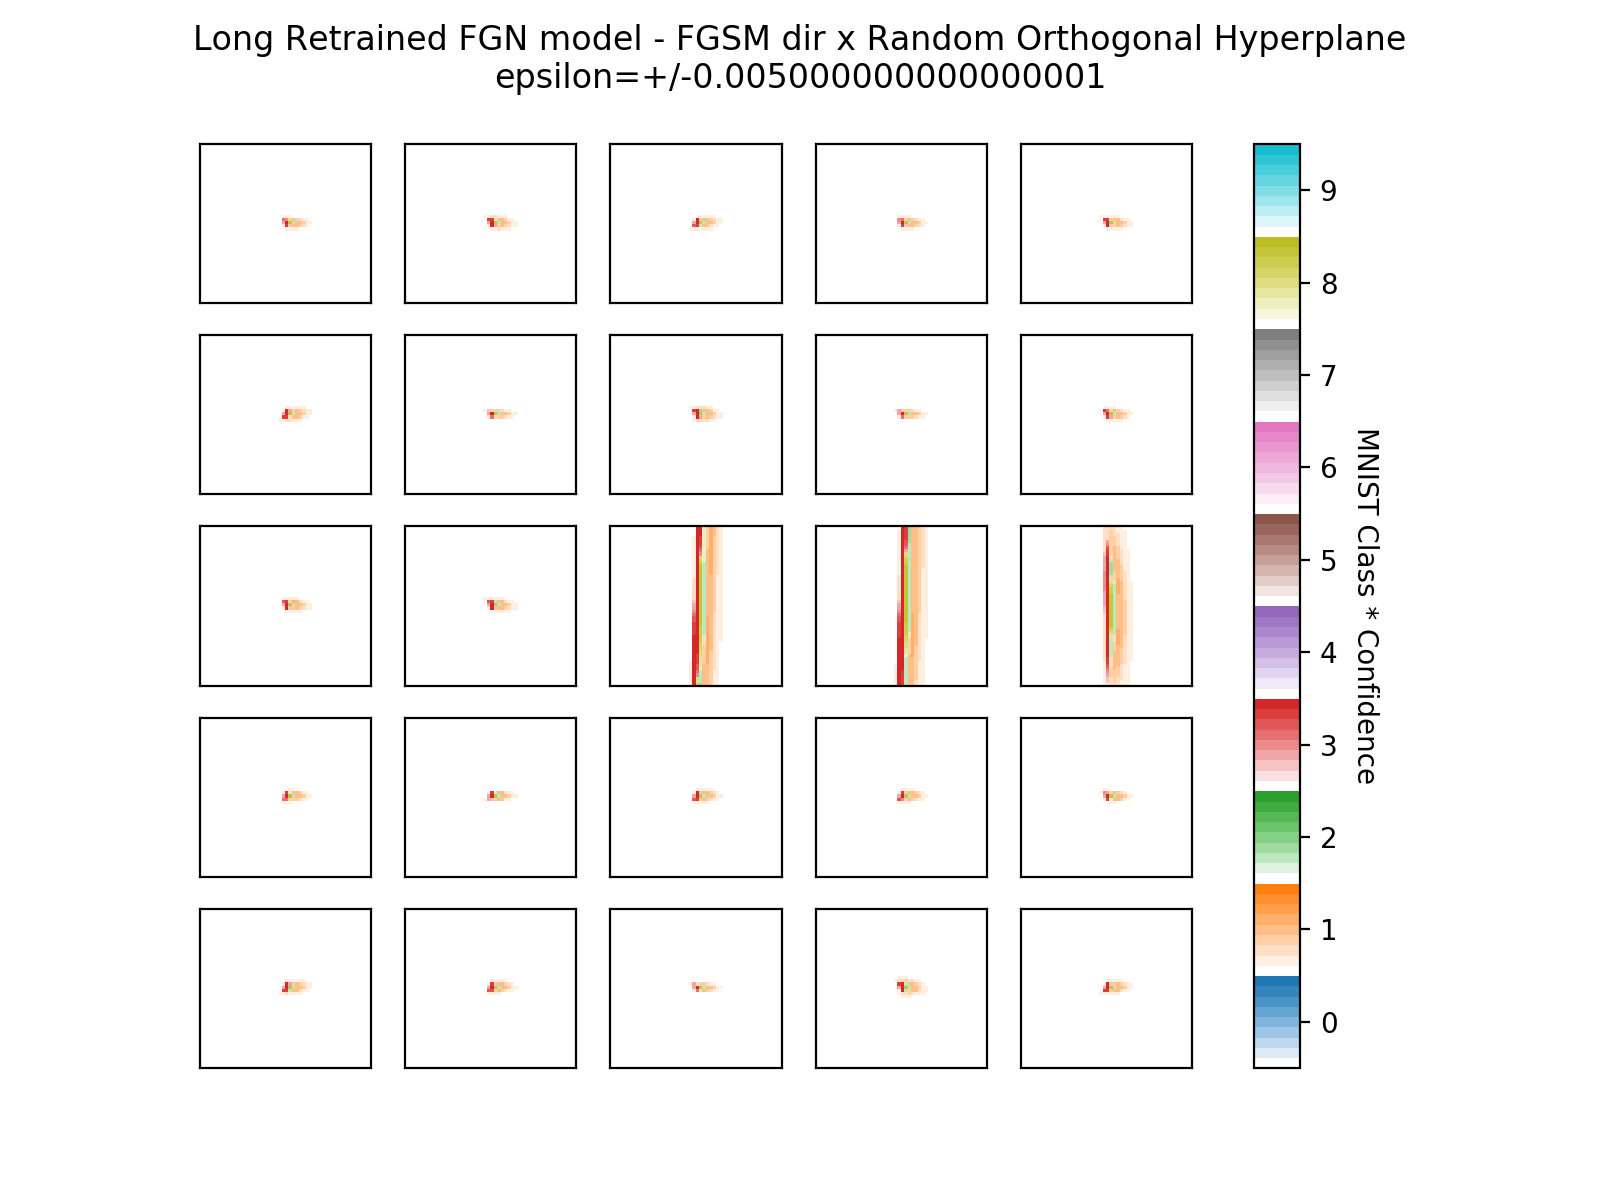

In [45]:
# zoom in
ret_long_fgn_fgsm_vec = fgnl.get_fgsm_attack_vectors(ret_long_fgn_model, img, loss_func)

factor = 0.1
fgnh.plot_MNIST_hyperplanes(ret_long_fgn_model, img-factor*epsilon*ret_long_fgn_fgsm_vec, img+factor*epsilon*ret_long_fgn_fgsm_vec, 
                        n_plots=5, grid_size=grid_size,  mode='canonical',
                        title='Long Retrained FGN model - FGSM dir x Random Orthogonal Hyperplane\nepsilon=+/-{}'.format(factor*epsilon))

# 2-Space between classes

In [46]:
img1 = mnist_val_loader.dataset.tensors[0][1]
img2 = mnist_val_loader.dataset.tensors[0][7]

loss_func = torch.nn.CrossEntropyLoss()
grid_size = 50

In [47]:
mnist_val_loader.dataset.tensors[1][0:10]

tensor([3, 8, 6, 9, 6, 4, 5, 3, 8, 4])

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


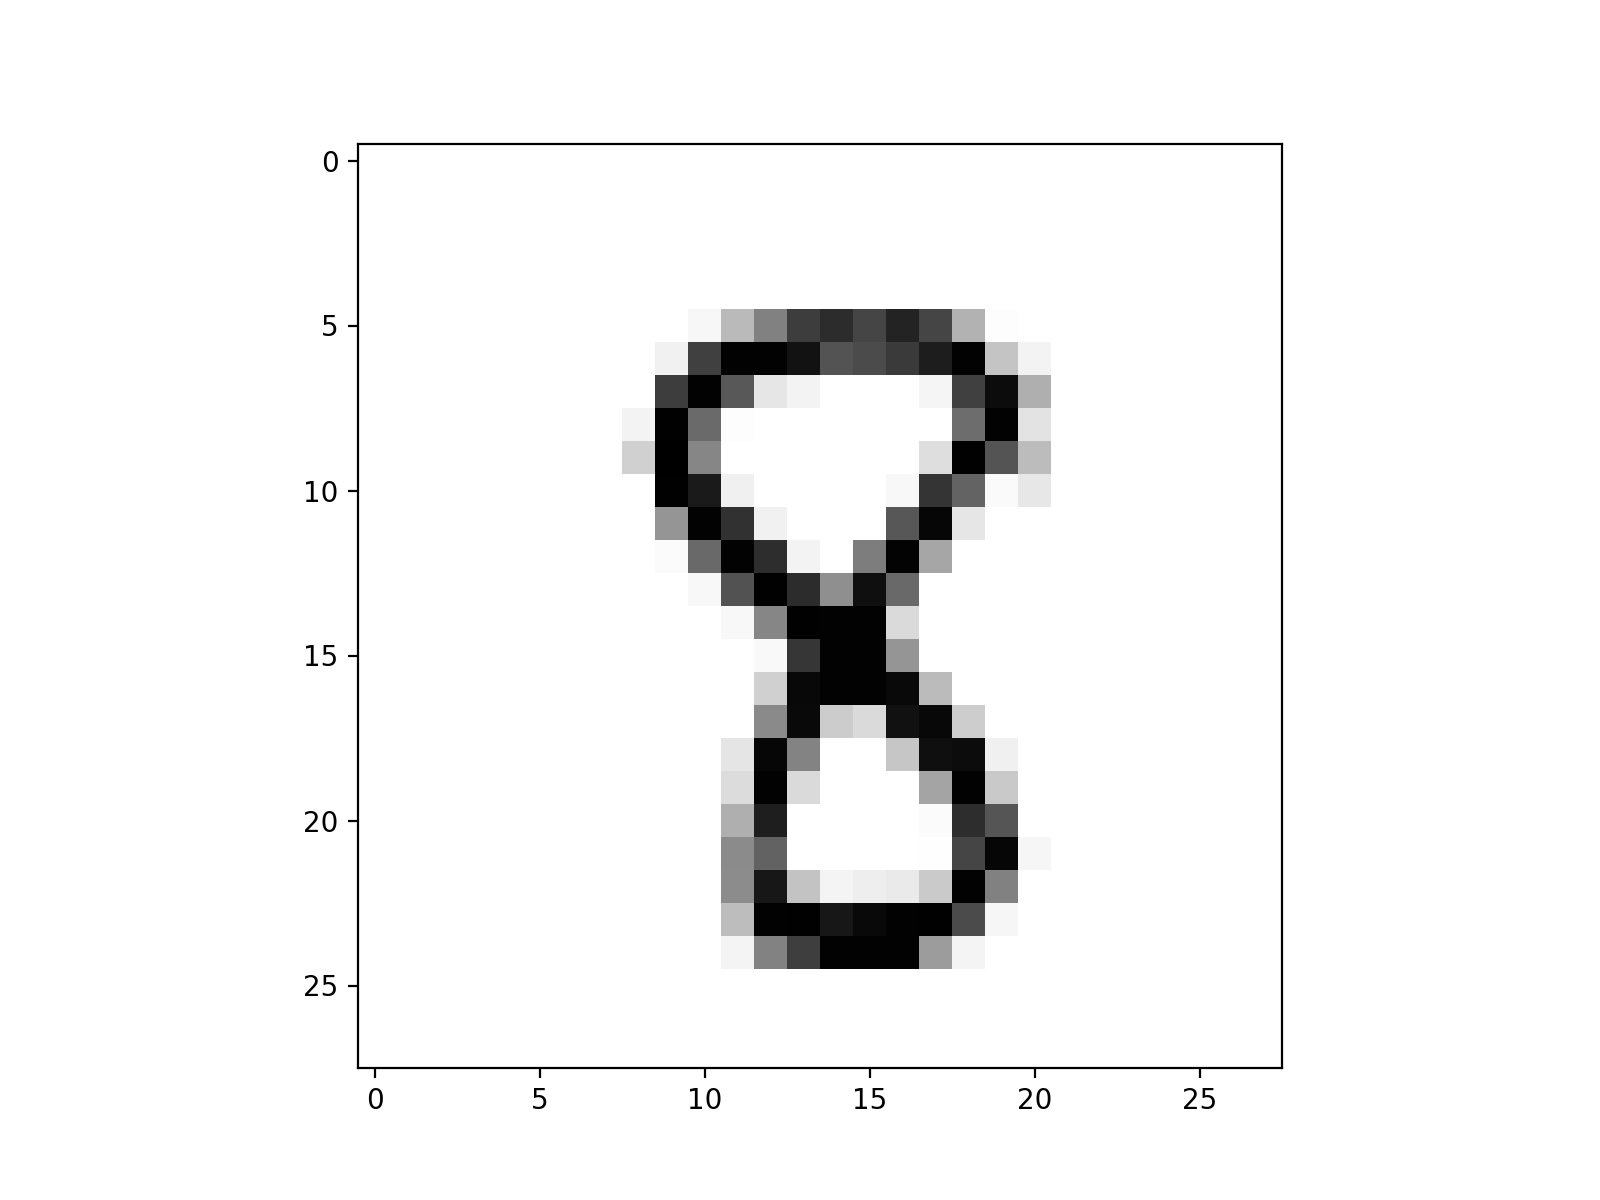

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


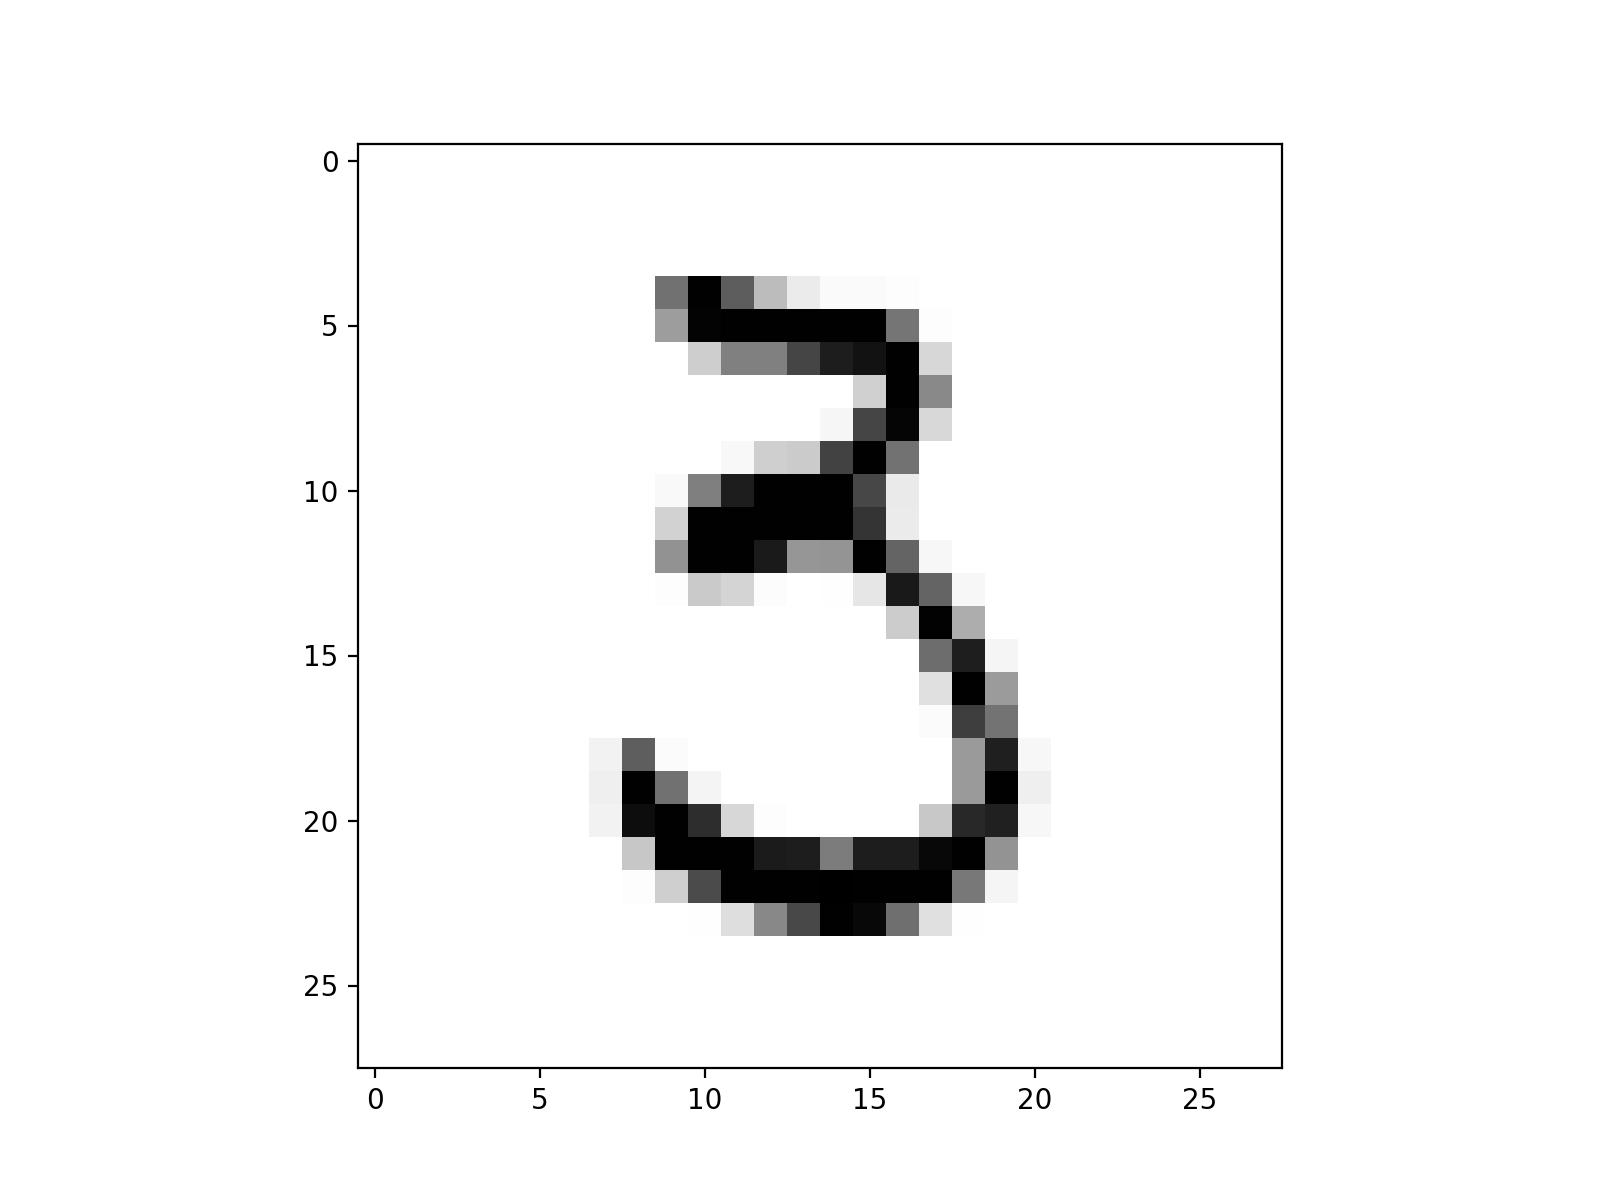

In [48]:
plt.imshow(img1, cmap='Greys')
plt.show()
plt.imshow(img2, cmap='Greys')
plt.show()

<IPython.core.display.Javascript object>


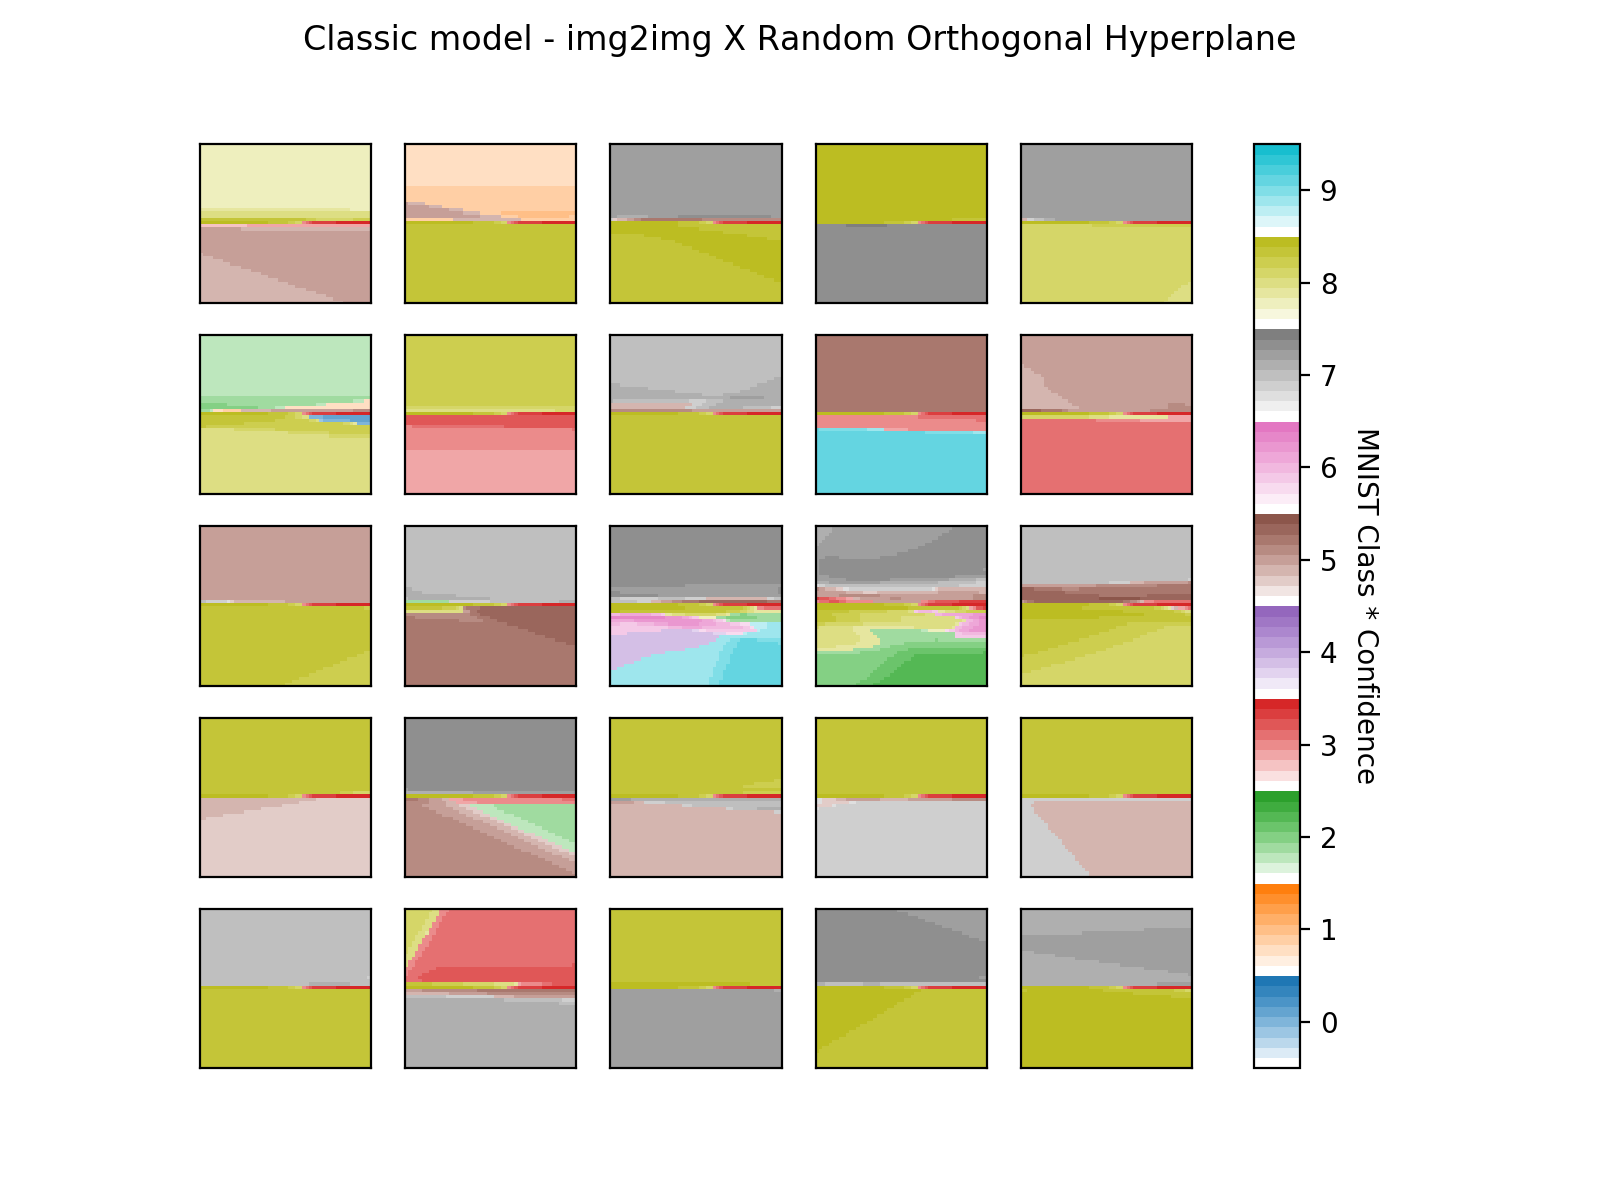

In [49]:
fgnh.plot_MNIST_hyperplanes(classic_model, img1, img2,
                            n_plots=5, grid_size=grid_size, mode='canonical',
                            title='Classic model - img2img X Random Orthogonal Hyperplane')

<IPython.core.display.Javascript object>


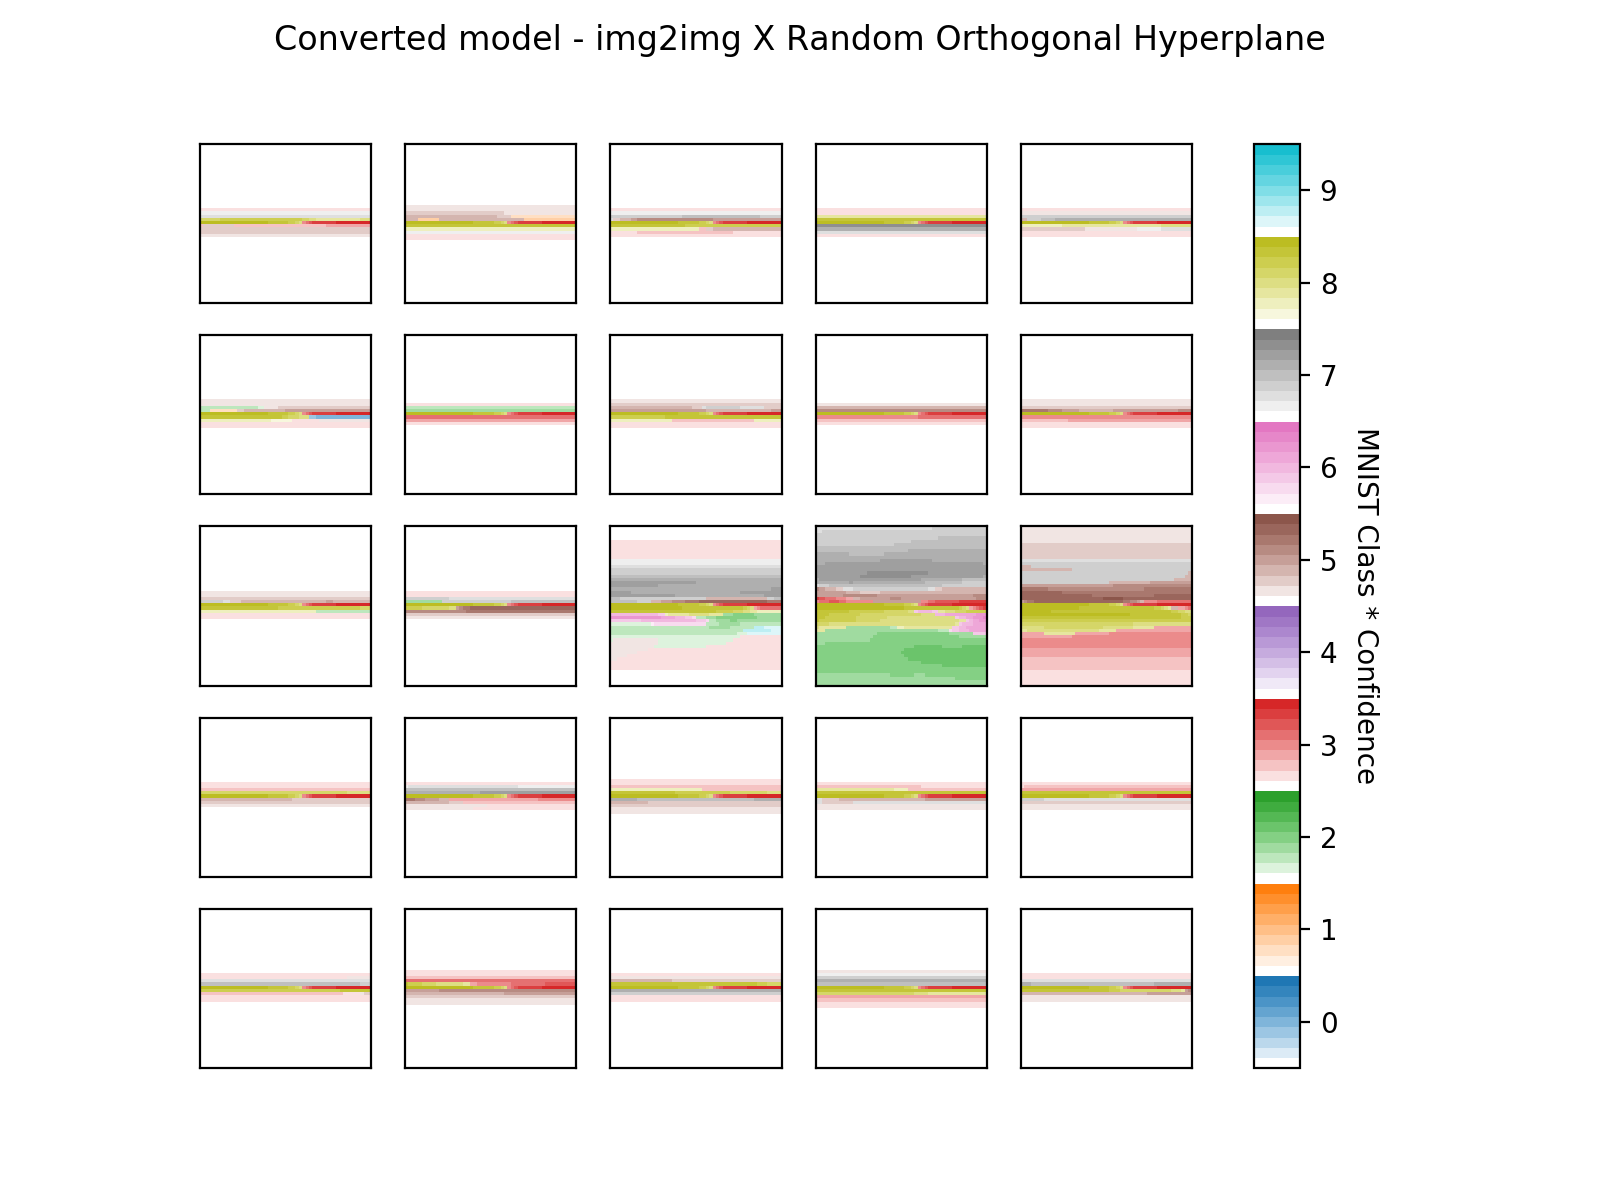

In [50]:
fgnh.plot_MNIST_hyperplanes(conv_fgn_model, img1, img2,
                            n_plots=5, grid_size=grid_size, mode='canonical',
                            title='Converted model - img2img X Random Orthogonal Hyperplane')

<IPython.core.display.Javascript object>


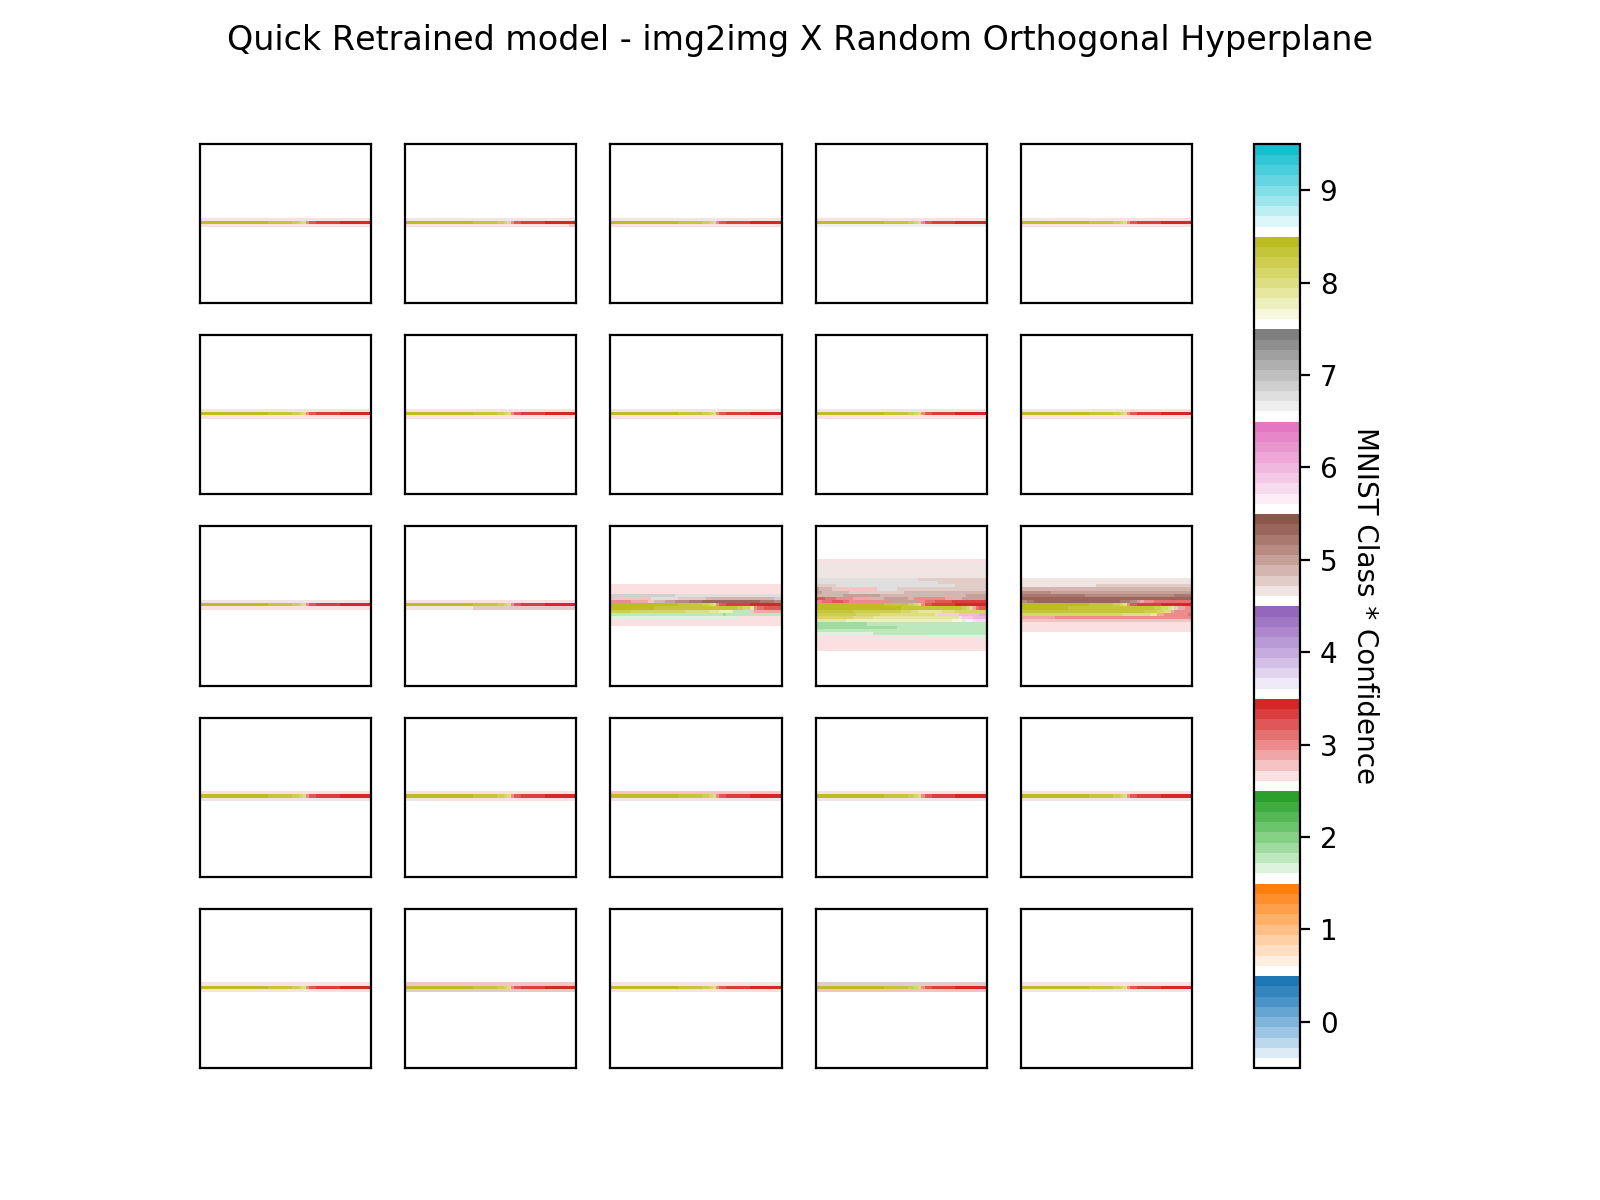

In [51]:
fgnh.plot_MNIST_hyperplanes(ret_quick_fgn_model, img1, img2,
                            n_plots=5, grid_size=grid_size, mode='canonical',
                            title='Quick Retrained model - img2img X Random Orthogonal Hyperplane')

<IPython.core.display.Javascript object>


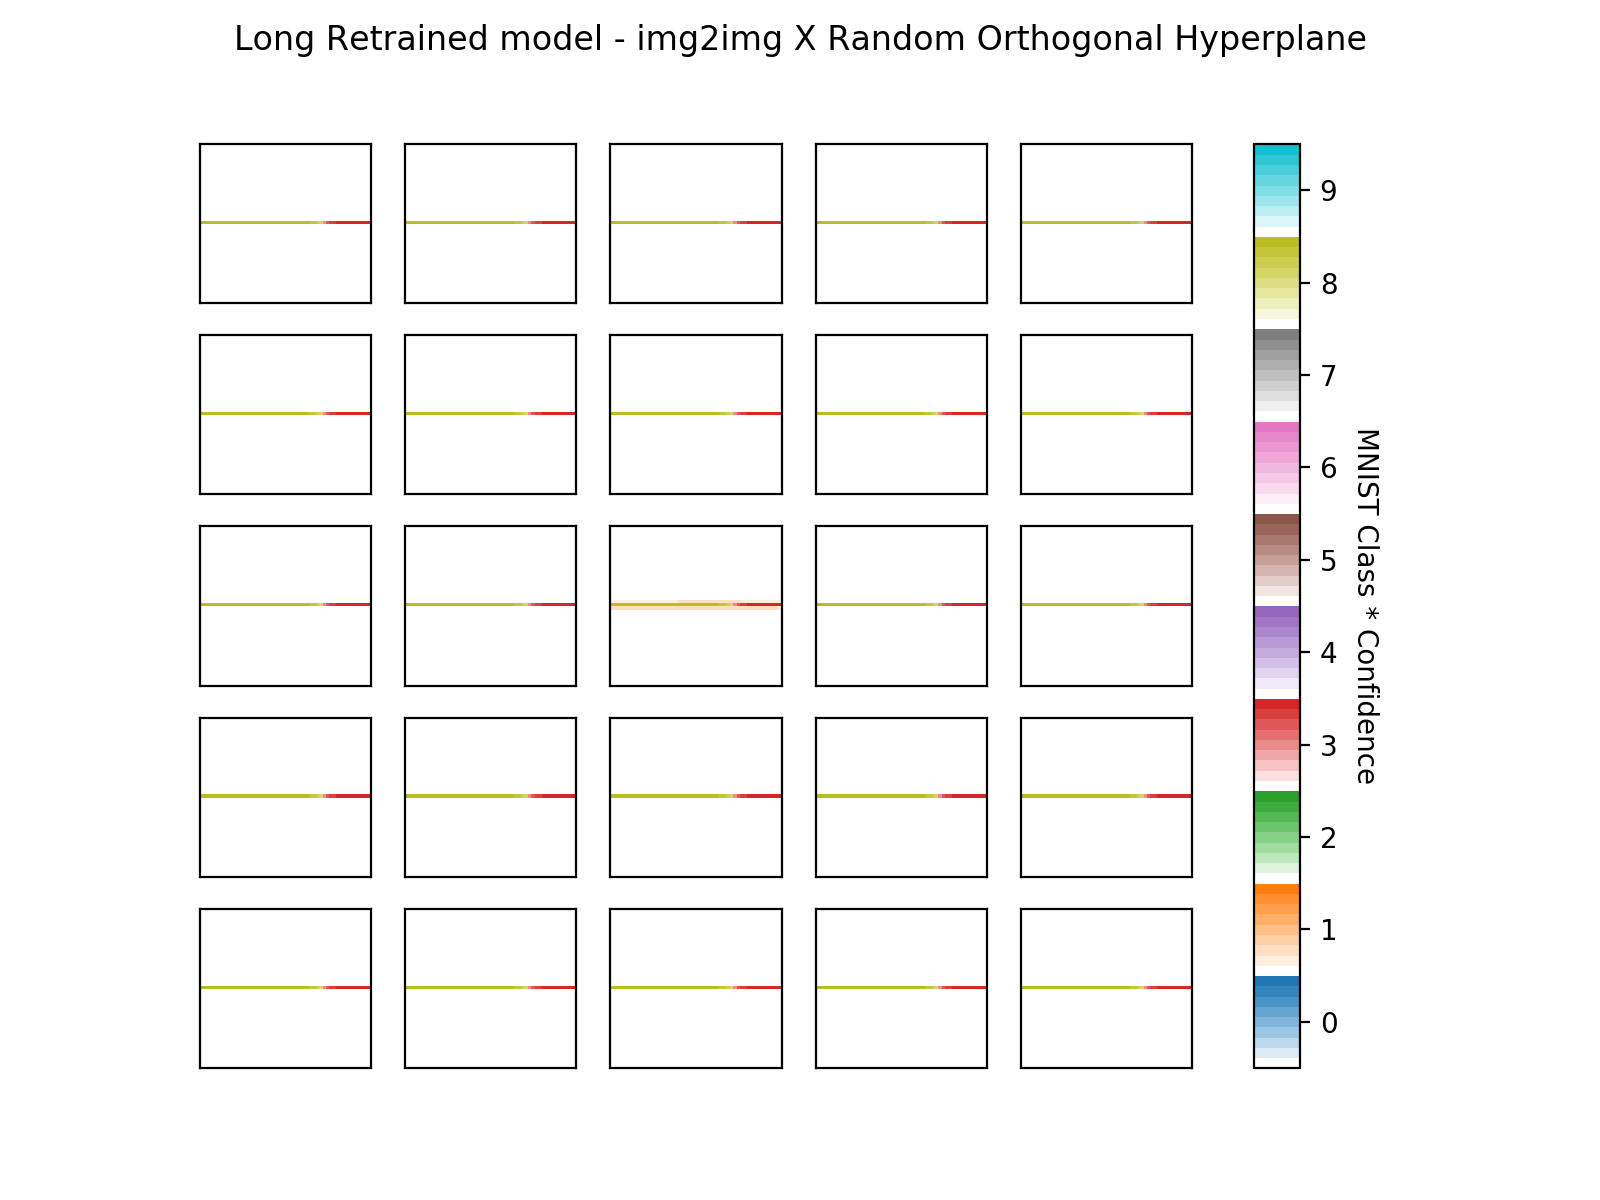

In [52]:
fgnh.plot_MNIST_hyperplanes(ret_long_fgn_model, img1, img2,
                            n_plots=5, grid_size=grid_size, mode='canonical',
                            title='Long Retrained model - img2img X Random Orthogonal Hyperplane')